In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
sns.set_style('darkgrid')
colors=["red","orange","green","navy","blue","aqua","purple","fuchsia"]

In [3]:
# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"F:\abdulazimkhan\BI\Capstone_Project_BI\capstone_2\car-data.csv")

In [5]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [6]:
df.isnull().sum()
# No null values found

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
df.nunique()

year               21
price            3970
transmission        3
mileage         10760
fuelType            4
tax                32
mpg                86
engineSize         12
dtype: int64

In [8]:
df[df.duplicated()]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
40,2018,18695,Manual,6753,Petrol,145,53.3,1.5
45,2018,17995,Manual,14837,Petrol,145,53.3,1.5
46,2018,17995,Manual,14337,Petrol,145,53.3,1.5
48,2019,22230,Manual,3392,Diesel,145,50.4,2.0
61,2019,25990,Semi-Auto,2423,Diesel,145,49.6,2.0
...,...,...,...,...,...,...,...,...
14477,2019,19360,Semi-Auto,4401,Diesel,145,50.4,2.0
14495,2019,22798,Manual,10,Petrol,145,43.5,1.5
14498,2019,23998,Semi-Auto,10,Diesel,145,50.4,2.0
14499,2019,21998,Semi-Auto,10,Petrol,145,42.8,1.5


### So there are few duplicate values.


In [9]:
df.drop_duplicates(keep="first",inplace=True)
df[df.duplicated()]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14893 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          14893 non-null  int64  
 1   price         14893 non-null  int64  
 2   transmission  14893 non-null  object 
 3   mileage       14893 non-null  int64  
 4   fuelType      14893 non-null  object 
 5   tax           14893 non-null  int64  
 6   mpg           14893 non-null  float64
 7   engineSize    14893 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.0+ MB


In [11]:
# importing date class from datetime module
from datetime import date

current_year = date.today().year

In [12]:
current_year

2021

In [13]:
 df["age"]=(current_year)-(df["year"])

In [14]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [15]:
df.drop("year",axis=1,inplace=True)

In [16]:
df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [17]:
num_df = df.select_dtypes(exclude="object")
cat_df =df.select_dtypes(include="object")

In [18]:
num_df.head()

,price,mileage,tax,mpg,engineSize,age
0,25000,13904,145,49.6,2.0,2
1,26883,4562,145,49.6,2.0,2
2,20000,7414,145,50.4,2.0,2
3,33492,4825,145,32.5,2.0,2
4,22900,6500,150,39.8,1.5,2


In [19]:
cat_df.head()

,transmission,fuelType
0,Automatic,Diesel
1,Automatic,Diesel
2,Manual,Diesel
3,Automatic,Petrol
4,Semi-Auto,Petrol


In [20]:
cat_df_dum = pd.get_dummies(cat_df)
cat_df_dum.head()

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,0,1
4,0,0,1,0,0,0,1


In [21]:
df1 = pd.concat([num_df,cat_df_dum],axis=1)
df1.head()

,price,mileage,tax,mpg,engineSize,age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,2,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,2,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,2,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,2,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,2,0,0,1,0,0,0,1


In [22]:
y=df1["price"]
X=df1.drop("price",axis=1)

In [23]:
X.head()

,mileage,tax,mpg,engineSize,age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,13904,145,49.6,2.0,2,1,0,0,1,0,0,0
1,4562,145,49.6,2.0,2,1,0,0,1,0,0,0
2,7414,145,50.4,2.0,2,0,1,0,1,0,0,0
3,4825,145,32.5,2.0,2,1,0,0,0,0,0,1
4,6500,150,39.8,1.5,2,0,0,1,0,0,0,1


In [65]:
X.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

## Let's try modeling the data without much treatment to it and see how models perform.

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [27]:
models=(RandomForestRegressor(),LinearRegression(),XGBRegressor())

In [28]:
def evaluate_models(Xtrain,Xtest,ytrain,ytest):
  
  for i in range(len(models)): 
    models[i].fit(Xtrain,ytrain)
    y_pred = models[i].predict(Xtest)

    print("Training score for :",models[i],"--------->",models[i].score(Xtrain,ytrain))
    print("Training score for :",models[i],"--------->",models[i].score(Xtest,ytest))
    print("--------------------------------------------------------")

In [29]:
evaluate_models(X_train,X_test,y_train,y_test)

Training score for : RandomForestRegressor() ---------> 0.9903025313278971
Training score for : RandomForestRegressor() ---------> 0.9370951900667777
--------------------------------------------------------
Training score for : LinearRegression() ---------> 0.8076686334317326
Training score for : LinearRegression() ---------> 0.8049531320713168
--------------------------------------------------------
Training score for : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) -

## Random forest shows pretty good results .Now let's do some treatment to the data set and see how it's performance on models changes. 

In [30]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

### Getting insights of the data

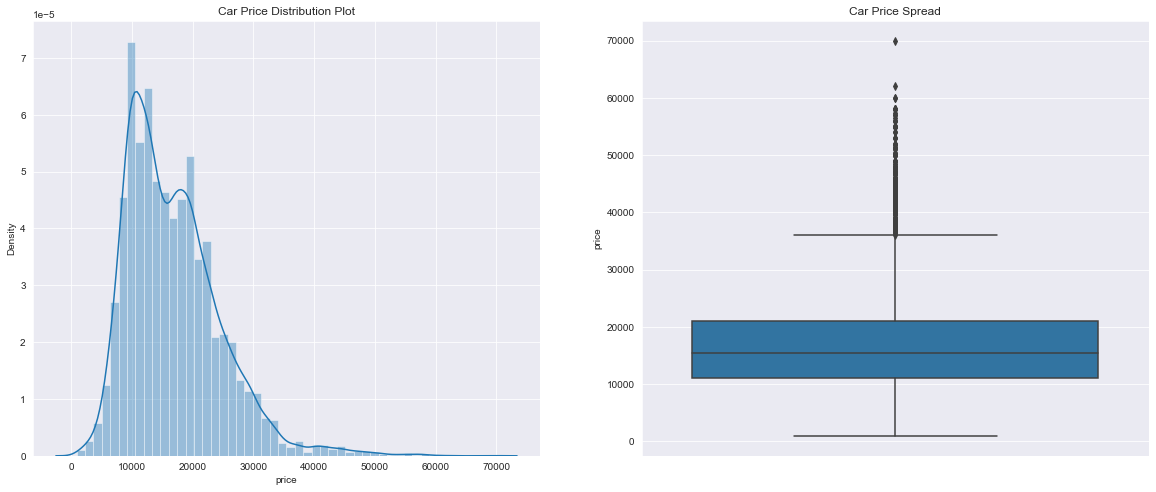

In [31]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [32]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    14893.000000
mean     16807.898073
std       7735.548874
min        899.000000
25%      10990.000000
50%      15494.000000
75%      20995.000000
85%      24396.000000
90%      26989.000000
100%     69994.000000
max      69994.000000
Name: price, dtype: float64


### Inference :
-The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

-There is a significant difference between the mean and the median of the price distribution.

-The data points are far spread out from the mean, which indicates a high variance in the car prices.(90% of the prices are below 26,989, whereas the remaining 10% are between 26,989 and 69,994.)

## Vizualing the categorical data


In [33]:
df.columns

Index(['price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'age'],
      dtype='object')

<AxesSubplot:xlabel='transmission'>

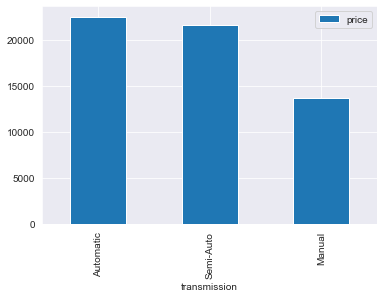

In [34]:

pd.DataFrame(df.groupby(['transmission'])['price'].mean().sort_values(ascending = False)).plot.bar()

<AxesSubplot:xlabel='fuelType'>

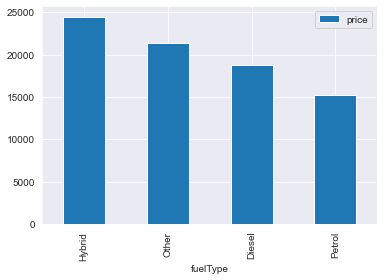

In [35]:
pd.DataFrame(df.groupby(['fuelType'])['price'].mean().sort_values(ascending = False)).plot.bar()

In [36]:
df['fuelType'].value_counts()

Petrol    8414
Diesel    6251
Hybrid     142
Other       86
Name: fuelType, dtype: int64

### We can see there is a imbalance in categorical distribution.Let's vizualize that.

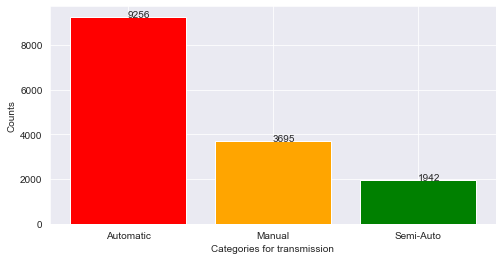

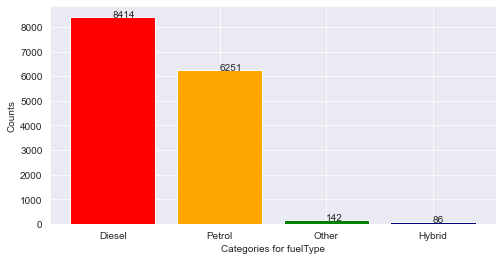

In [37]:
# let's check for any bias among the categorical features in distribution of categories.
for i in range(len(cat_df.columns)):
    
    plt.figure(figsize=(8,4))
    plt.bar(cat_df[cat_df.columns[i]].unique(),cat_df[cat_df.columns[i]].value_counts(),color=colors)
    addlabels(cat_df[cat_df.columns[i]].unique(),cat_df[cat_df.columns[i]].value_counts())
    plt.xlabel("Categories for "+cat_df.columns[i])
    plt.ylabel("Counts")

Here we can see there is a huge imbalance among the categorical distribution in `fuelType` feature,which needs to be treated before feeding the data for modeling.

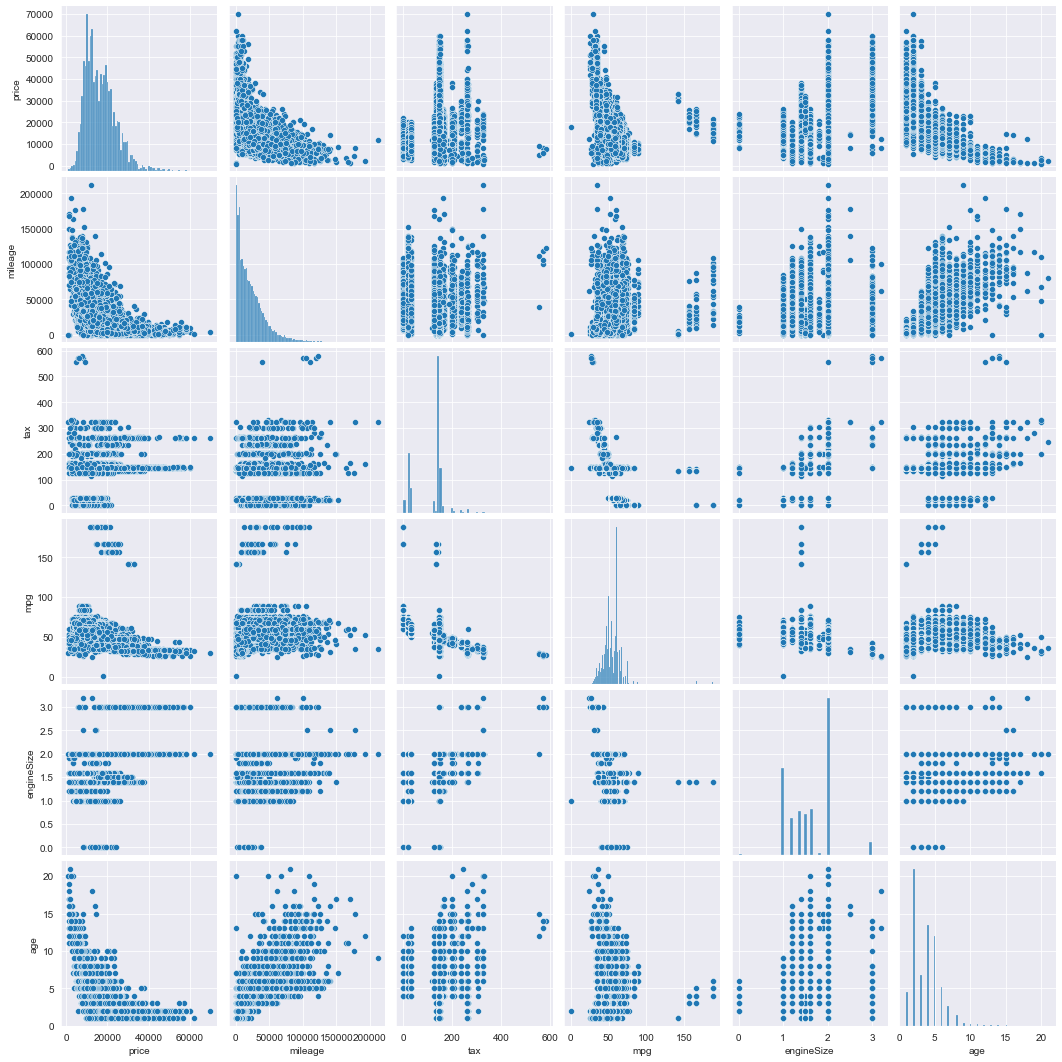

In [38]:
sns.pairplot(df)
plt.show()

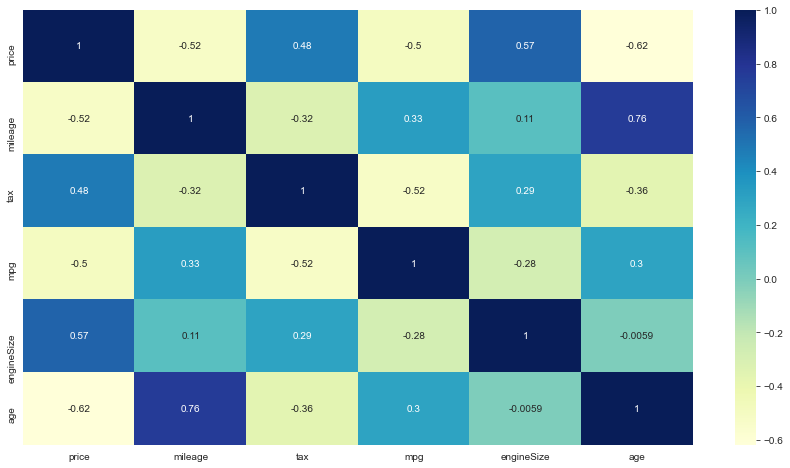

In [39]:
#Correlation using heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### From this correlation heatmap we can see there is pretty good impact of all numrical feature on `price` of the car. Now let's check their relation with scatter plot further more.

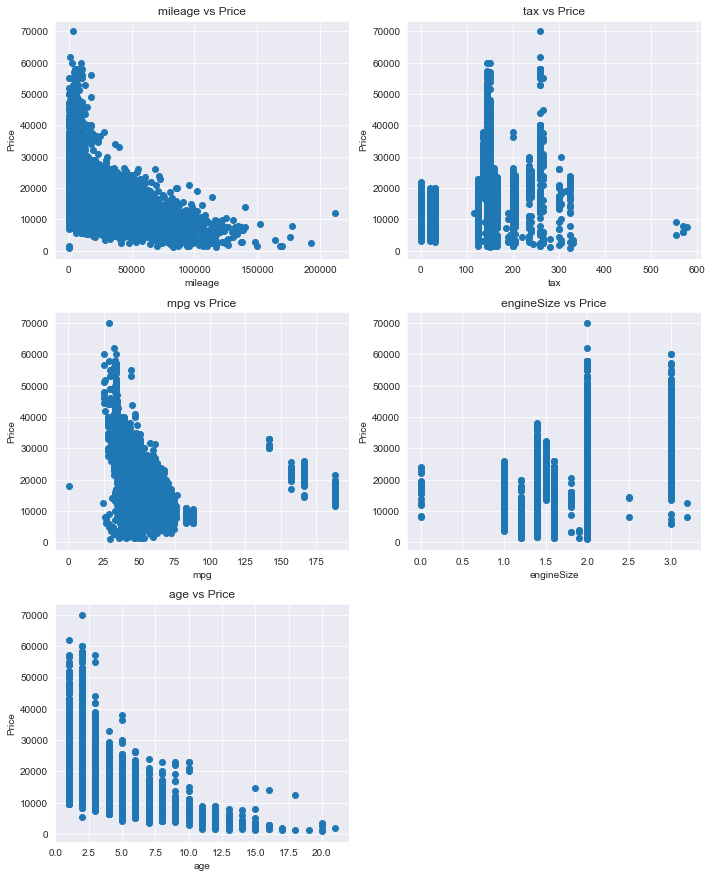

In [40]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('mileage', 1)
scatter('tax', 2)
scatter('mpg', 3)
scatter('engineSize', 4)
scatter('age',5)

plt.tight_layout()

Let's do some resampling to the `fuelType` feature and make it balanced among categories.

In [41]:
from sklearn.utils import resample

df_majority = df[df.fuelType=="Diesel"]
df_minority1 = df[df.fuelType=="Hybrid"]
df_minority2 = df[df.fuelType=="Other"]
df_minority3 = df[df.fuelType=="Petrol"]


df_minority_resampled1 = resample(df_minority1,replace=True,n_samples=len(df_majority),random_state=42)
df_minority_resampled2 = resample(df_minority2,replace=True,n_samples=len(df_majority),random_state=42)
df_minority_resampled3 = resample(df_minority3,replace=True,n_samples=len(df_majority),random_state=42)



df_upsampled = pd.concat([df_minority_resampled1,df_minority_resampled2,df_minority_resampled3,df_majority])

df_upsampled.fuelType.value_counts()

Petrol    6251
Hybrid    6251
Diesel    6251
Other     6251
Name: fuelType, dtype: int64

In [42]:
df_upsampled.columns

Index(['price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'age'],
      dtype='object')

In [43]:
cat_df1 = df_upsampled.select_dtypes(include="object")
num_df1 = df_upsampled.select_dtypes(exclude="object")

In [44]:
cat_df1_dum = pd.get_dummies(cat_df1)
cat_df1_dum.shape

(25004, 7)

In [45]:
num_df1.shape

(25004, 6)

In [46]:
df_new= pd.concat([cat_df1_dum,num_df1],axis=1)

In [47]:
df_new.columns

Index(['transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'price', 'mileage', 'tax', 'mpg',
       'engineSize', 'age'],
      dtype='object')

In [48]:
y1 = df_new["price"]
X1 = df_new.drop("price",axis=1)

In [49]:
# Train test split

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [50]:
# Evaluating model on upsampled data
evaluate_models(X_train1,X_test1,y_train1,y_test1)

Training score for : RandomForestRegressor() ---------> 0.995303783750715
Training score for : RandomForestRegressor() ---------> 0.9737133106359442
--------------------------------------------------------
Training score for : LinearRegression() ---------> 0.7811601921765208
Training score for : LinearRegression() ---------> 0.7747455133135153
--------------------------------------------------------
Training score for : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --

### Lets try modeling with removing outliers from `price` feature 

In [51]:

# calculate interquartile range
q25, q75 = np.percentile(df_new["price"], 25), np.percentile(df_new["price"], 75)
iqr = q75 - q25

In [52]:
iqr*1.5

17085.0

In [53]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [54]:
lower,upper

(-3486.0, 42074.0)

In [55]:
# identify outliers
outliers = [x for x in df_new["price"] if x < lower or x > upper]


In [56]:
# Assigning the cleaned data to an array
outliers_removed = [x for x in df_new["price"] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 24659


In [57]:
len(df_new["price"])

25004

In [58]:
df_new["price"].values

array([28995, 30498, 16998, ...,  8950,  2995,  5990], dtype=int64)

In [59]:
df_new1 =df_new[df_new["price"].isin(outliers_removed)]

In [60]:
y2 = df_new1["price"]
X2 = df_new1.drop("price",axis=1)

In [61]:
# Train test split

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [62]:
# Evaluating on upsampled and outlier treated data
evaluate_models(X_train2,X_test2,y_train2,y_test2)

Training score for : RandomForestRegressor() ---------> 0.9954993599097031
Training score for : RandomForestRegressor() ---------> 0.969847231692063
--------------------------------------------------------
Training score for : LinearRegression() ---------> 0.8011705600702876
Training score for : LinearRegression() ---------> 0.8019176799669229
--------------------------------------------------------
Training score for : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --

In [64]:
X_test2

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,mileage,tax,mpg,engineSize,age
5586,1,0,0,0,0,1,0,24695,160,44.1,2.0,5
6385,0,1,0,1,0,0,0,55500,20,68.9,1.6,5
5394,1,0,0,0,0,1,0,5000,145,52.3,2.0,2
10748,0,0,1,1,0,0,0,22585,145,49.6,2.0,3
2556,0,1,0,1,0,0,0,52588,20,67.3,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,0,0,1,0,1,0,0,810,150,44.8,1.5,1
1691,0,1,0,1,0,0,0,61958,20,67.3,2.0,7
10304,0,1,0,1,0,0,0,50618,145,53.3,2.0,5
3368,0,1,0,0,0,0,1,5000,145,49.6,1.5,2


In [63]:
for i in range(10,300,20):
    rfr= RandomForestRegressor(n_estimators=i)
    rfr.fit(X_train2,y_train2)
    print("Score on test data with ",i,"estimators is ",rfr.score(X_test2,y_test2)) 
    print("-----------------------------------------------------------------------")


Score on test data with  10 estimators is  0.9688386030020503
-----------------------------------------------------------------------
Score on test data with  30 estimators is  0.9698666211238346
-----------------------------------------------------------------------
Score on test data with  50 estimators is  0.9693432110309133
-----------------------------------------------------------------------
Score on test data with  70 estimators is  0.9700745531265199
-----------------------------------------------------------------------
Score on test data with  90 estimators is  0.9698202184955858
-----------------------------------------------------------------------
Score on test data with  110 estimators is  0.9698368572232079
-----------------------------------------------------------------------


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train2, y_train2)

In [ ]:
best_random =rf_random.best_params_
best_random


In [ ]:
rfb= RandomForestRegressor(n_estimators=673,min_samples_split= 5,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 40,bootstrap= True)

In [ ]:
rfb.fit(X_train2,y_train2)
rfb.score(X_test2,y_test2)

### Saving the model


In [ ]:
# import pickle

In [ ]:
# f = open("rfr.pickle","wb")
# pickle.dump(rfb,f)
# f.close()
